# 1. Dig into the data: to predict estimated shares outstanding

## a. Load the data and drop 'Ticker Symbol’, ‘Period Ending’, ‘For Year'

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(seed=5566)

In [3]:
fundamental_df = pd.read_csv("fundamentals.csv")
fundamental_df.head() # 79 columns

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [4]:
fundamentals = fundamental_df.drop(columns = ['Ticker Symbol', 'Period Ending', 'For Year'])
fundamentals = fundamentals.loc[:, ~fundamentals.columns.str.contains('^Unnamed')]
fundamentals = fundamentals.dropna()

In [5]:
fundamentals.head() # 75 columns

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,...,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,-5.60,3.350000e+08
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,...,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,-11.25,1.630222e+08
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,...,4.322500e+10,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,4.02,7.169154e+08
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6000000.0,...,4.841500e+10,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,11.39,6.681299e+08
4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7000.0,...,4.613814e+09,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,5.29,7.328355e+07


In [6]:
fundamentals.info() # 1299 rows, 75 columns

<class 'pandas.core.frame.DataFrame'>
Index: 1299 entries, 0 to 1779
Data columns (total 75 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Accounts Payable                                     1299 non-null   float64
 1   Accounts Receivable                                  1299 non-null   float64
 2   Add'l income/expense items                           1299 non-null   float64
 3   After Tax ROE                                        1299 non-null   float64
 4   Capital Expenditures                                 1299 non-null   float64
 5   Capital Surplus                                      1299 non-null   float64
 6   Cash Ratio                                           1299 non-null   float64
 7   Cash and Cash Equivalents                            1299 non-null   float64
 8   Changes in Inventories                               1299 non-null   floa

## b. Split data set with 70% train and 30% test then build random forest model.  Default every (hyper-)parameter then compute MSE. 

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = fundamentals.drop(['Estimated Shares Outstanding'], axis = 1)
y = fundamentals['Estimated Shares Outstanding']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 1)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=1)

In [11]:
from sklearn.metrics import mean_squared_error

# Prediction
y_pred = rf_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mse

1.3900117181106947e+17

## c. Build random forest with min_samples_split set to 3.  Compare with random forest model in (b).  Explain.

In [12]:
rf_model_min = RandomForestRegressor(min_samples_split = 3, random_state = 1)
rf_model_min.fit(X_train_scaled, y_train)
y_pred = rf_model_min.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mse

1.3417177104783466e+17

### Explanation:

The second model has a slightly lower MSE compared to the first model. By reducing the minimum sample size to 3, it allows the tree to grow more deeper and more complex, it allows the model to behave better on the data, though there is a risk of overfitting also. 

### d. Use "Mean Decrease in Impurity" and "Permutation Feature Importance" to compute the variable importance of the random forest in (c).  Explain how each method computes the variable importance and compare their results.

In [13]:
from sklearn.inspection import permutation_importance
# Compute Mean Decrease in Impurity
feature_importances_mdi = rf_model_min.feature_importances_

# Compute Permutation Feature Importance
result = permutation_importance(rf_model_min, X_test_scaled, y_test, n_repeats=10, random_state=1)
feature_importances_perm = result.importances_mean

print("Feature importances using MDI: ", feature_importances_mdi)
print("Feature importances using PFI: ", feature_importances_perm)

Feature importances using MDI:  [0.00294152 0.00075183 0.00114309 0.00232025 0.00091839 0.00745395
 0.0024874  0.00285065 0.00279553 0.00591375 0.00263091 0.00188582
 0.00136946 0.00157716 0.0155627  0.12664464 0.00880228 0.00465275
 0.00218313 0.00278812 0.00255321 0.00742118 0.00936356 0.00087519
 0.00301844 0.00169229 0.00133983 0.00516182 0.00074733 0.00196774
 0.00262532 0.00810233 0.00235076 0.00333646 0.00074051 0.06661842
 0.00363564 0.00550991 0.01076453 0.00100515 0.0105299  0.02436908
 0.00271917 0.00462584 0.02191153 0.00196399 0.00495493 0.00452161
 0.00243154 0.0132073  0.00190461 0.00131209 0.00277931 0.00150075
 0.00081267 0.00060581 0.00218202 0.00235415 0.00101778 0.00698806
 0.00558086 0.00413406 0.00393004 0.00393983 0.05761576 0.11717586
 0.00584926 0.00270369 0.23491945 0.00142183 0.06760714 0.0017598
 0.00161394 0.04255339]
Feature importances using PFI:  [ 1.65460655e-03 -7.35786883e-05  8.15527874e-04 -1.70222343e-04
 -1.69575592e-04  6.49736377e-03  9.75333799

Mean Decrease in Impurity: Sum the decreases in Gini inpurity caused by each features across all trees in the forest, and normalized by the total number of trees. This is computed during the model training, which requires no addtional computation. 
Permutation Feature Importance:  for each feature, shuffling the values of the features, while keeping all the other features same, and then measuring the decrease in the model's performance. The decrease in performance is averaged through several repetitions, and represents the importance of each feature. This requires more computation while provides better understanding of the behavior of the model's on unseen data. 
From the result of calculation for MDI, there are some features with high importance score (eg. 0.23491945 ), while it might have a different importance ranking under the calculation for PFI scores. 

### e. Use the same split to build lasso regression.  Compare with last model (c). 

In [14]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(random_state=1)
lasso_model.fit(X_train_scaled, y_train)
y_pred = lasso_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mse

C:\Users\szhou\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.528e+19, tolerance: 9.190e+16
  model = cd_fast.enet_coordinate_descent(


1.9494457041767226e+17

### Explanation:

The random forest regression (c) has a lower MSE and shows a better performace compared to the lasso regression. The random forest model is a better suit in the data and produce more accurate predictions. However, Lasso regression model is more interpretable than random foresst because it is a linear model. The effect of a one-unit change in one variable on the target varaible can be easily measured by the coefficients. Also Lasso regresson is able to simplifiy the model by shrinking some coefficients to zero while random forest makes model more complex. And Random Forest makes interpretation challenging when interpretation is the goal. 

# 2. Decision Tree Classification

## a. Use the breast cancer dataset to build decision tree classifier to predict the diagnosis.  Split the data into 70% train and 30% test. 

In [15]:
np.random.seed(seed=5566)

In [16]:
cancer_df = pd.read_csv("breast_cancer.csv")
cancer_df = cancer_df.loc[:, ~cancer_df.columns.str.contains('^Unnamed')]

In [17]:
cancer_df.head() # 32 columns

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [19]:
missing_values_cancer = cancer_df.isnull().sum()
missing_values_cancer = missing_values_cancer[missing_values_cancer > 0]
missing_values_cancer # no missing values

Series([], dtype: int64)

In [20]:
# Encoding diagnosis column
cancer_df['diagnosis'] = cancer_df['diagnosis'].map({'M': 1, 'B': 0})

In [21]:
# Drop column 'id' as irrelevant
cancer_df.drop(columns=['id'], inplace=True)

In [29]:
cancer_df.info() # 31 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = cancer_df.drop(['diagnosis'], axis = 1)
y = cancer_df['diagnosis']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(random_state=1)
decision_tree_classifier.fit(X_train_scaled, y_train)
y_pred = decision_tree_classifier.predict(X_test_scaled)

## b. Print Confusion matrix and explain

In [24]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[108   0]
 [ 12  51]]


False positives is zero indicates the model has not made any Type I error, and did not label any true benign tumors as malignant.

False negatives is 12 meaning there are 12 Type II errors, where it should have been labled as malignant but was labled as benign. This can be a big risk in a medical diagnosis context, as it represents cases of cancer that the model failed to detect.

## c. Visualize the tree.  What variables are in the plot? 

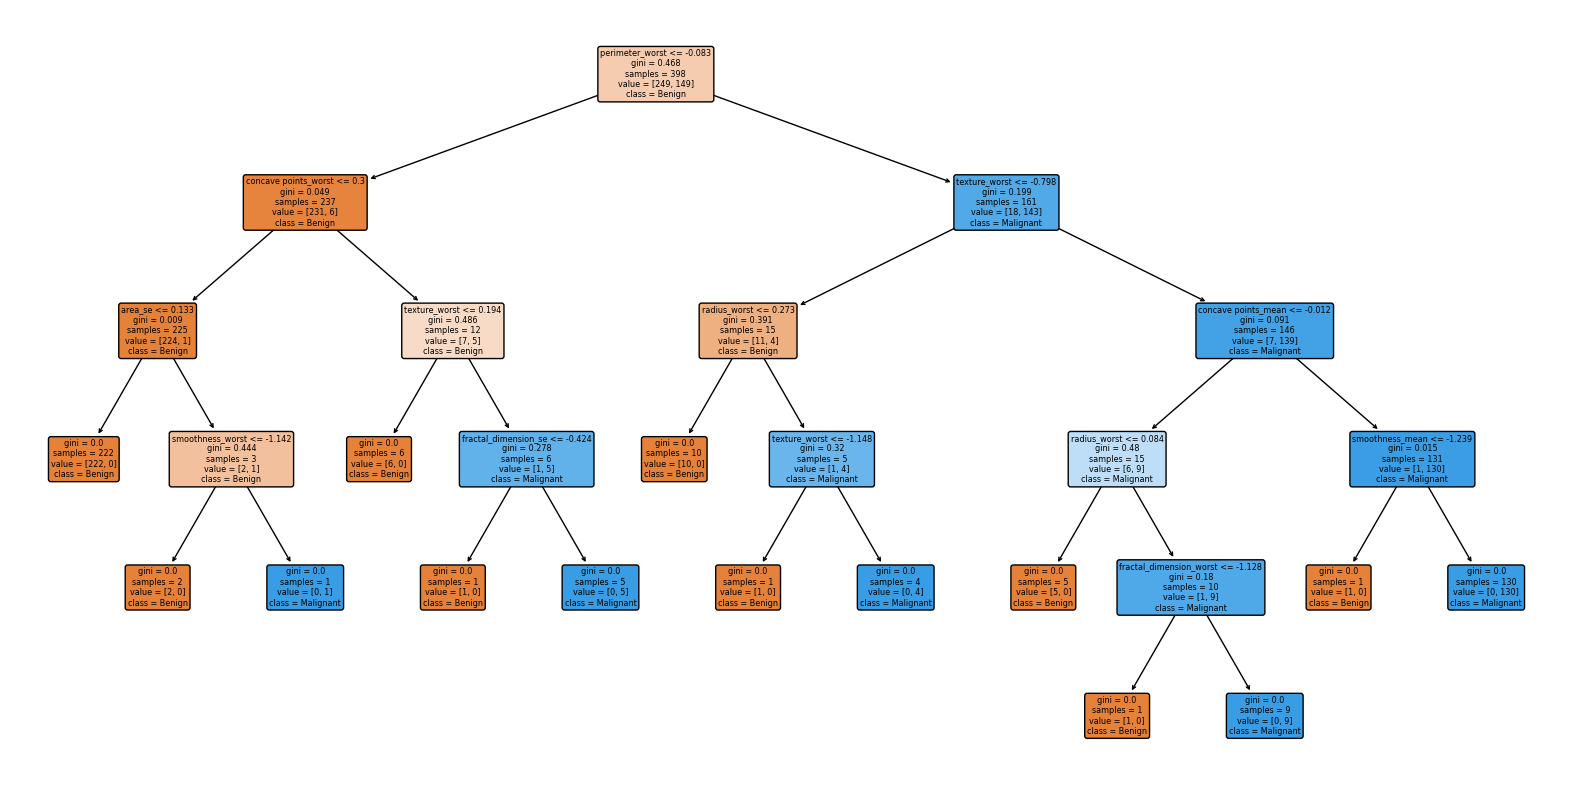

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(decision_tree_classifier, filled=True, feature_names=X.columns.tolist(), class_names=['Benign', 'Malignant'], rounded=True)
plt.show()

The decision tree uses some variables to make a decision to split the tree, or make a prediction on Benign and Malignant. For example, It uses threshold of 0.3 with concave points_worst to seperate the samples initially. Other variables such as area_se, texture_worst, radius_worst, perimeter_worst, smoothness_worst, fractal_dimension_se, concave points_mean, smoothness_mean, fractal_dimension_worst, all help to make the decisions. 

## d. Would you consider pruning this tree?  Why?  Where?  Explain how you would go about deciding where to prune the tree?  What measures would you use?

Yes, for some trees I would consider pruning it. For example, the tree of Smoothness_mean <= -1.239, the left sample has size of 1 and right sample has size of 130 and both leaves have gini score as 0 which is perfectly pure. Considering the big difference of the sample size, this tree can be overfitting, that the parent node is just captruing noise rather than potential patterns, so I would consider prune the tree here. After pruning, I could perform cross-validation to assess the model performace without this mode to compare. Or look at the changes of MSE and accuracy.